In [101]:
import yfinance as yf
import pandas as pd
import os

In [102]:
# Initializes Ticker class which enables download of price history of a single symbol.
sp500 = yf.Ticker("^GSPC")

In [103]:
# Query historical prices throughout history
sp500 = sp500.history(period="max")

In [104]:
# Displays data
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,0.0,0.0
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,0.0,0.0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,0.0,0.0


In [105]:
# Displays index components individually
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00',
               '2024-07-25 00:00:00-04:00', '2024-07-26 00:00:00-04:00',
               '2024-07-29 00:00:00-04:00', '2024-07-30 00:00:00-04:00',
               '2024-07-31 00:00:00-04:00', '2024-08-01 00:00:00-04:00',
               '2024-08-02 00:00:00-04:00', '2024-08-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24264, freq=None)

<Axes: xlabel='Date'>

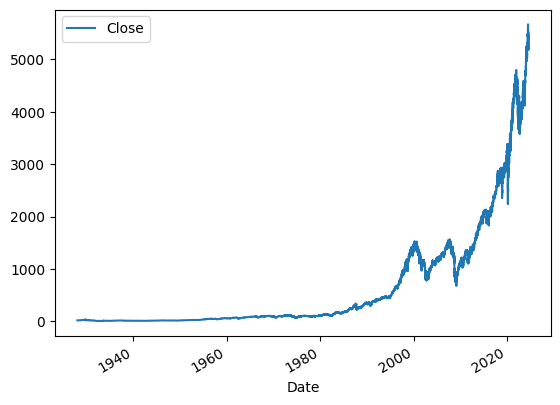

In [106]:
# Plots the price history using matplotlib
sp500.plot.line(y="Close", use_index=True)

In [107]:
# Deletes the Dividends and Stock Splits column
del sp500["Dividends"]
del sp500["Stock Splits"]

In [108]:
# Set up target to predict if price will go up or down tomorrow
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [109]:
# Displays data shifted back one day
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059


In [110]:
# Chceck if tomorrow's price is greater than today's price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [111]:
# Target is 1 if price went up, 0 if price went down
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0


In [112]:
# Remove all data that came before 1990
sp500 = sp500.loc["1990-01-01":].copy()

In [113]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0


In [127]:
# Start to train ML model
from sklearn.ensemble import RandomForestClassifier

# Initialize ML model with these parameters
    # n_estimators is number of individual decision trees we want to train, the higher this is, generally the better your accuracy
        # Try with a higher value
    # min_sample_split helps protect against overfitting (experiment with this value)
        # Decision trees have a tendency to overfit if the tree is built too deeply
        # The higher this is, 
            # the less accurate the model will be
            # but the less it will overfit
    # random_state allows randomly generated numbers to be in a predictable sequence
        # Helps when updating/improving model to make sure it is you/model that did something to improve the error vs something random

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

# Train set with time series data
# Can't use cross validation b/c results will look good when training, bad IRL
    # Doesn't take time series nature into account, will result in leakage
train = sp500.iloc[:-100]     
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
# Using predictor columns to try to predict the target
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [128]:
# Measure accuracy of the model

# precision_score determines if model was correct 
    # e.g. if the market actually went up when it was predicted to do so
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])

In [129]:
# Changing predictions from NumPy array to Pandas series
import pandas as pd

# Use same index as test data set
predictions = pd.Series(predictions, index=test.index)

In [130]:
# Not a good precision score
precision_score(test["Target"], predictions)

np.float64(0.5384615384615384)

In [133]:
# Combined of actual values with the predicted values
combined = pd.concat([test["Target"], predictions], axis=1)

<Axes: xlabel='Date'>

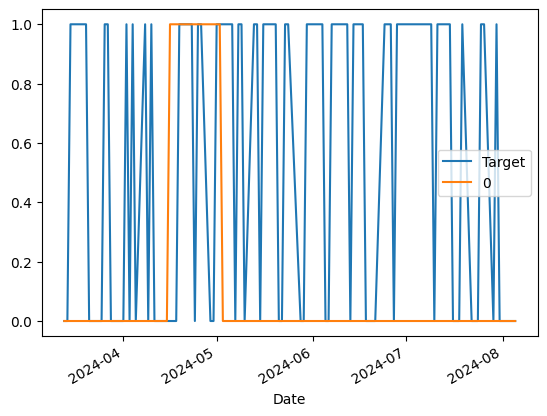

In [134]:
combined.plot()

# Orange line (0) is our predictions
# Blue line (Target) is what actually happened

In [135]:
# Building a backtesting system to test across multiple years of data

# Prediction function to wrap up all previous work into one function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
    

In [139]:
# Backtest function
    # Start value is 250 trading days x 10 = train your model with 10 years of training data
    # Step value means train a model for about a year then go to the next year, etc.
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    # Loop across data year by year
    for i in range(start, data.shape[0], step):
        # Training set of all years prior to current year
        train = data.iloc[0:i].copy()
        # Test set is current year
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [140]:
predictions = backtest(sp500, model, predictors)

In [141]:
predictions["Predictions"].value_counts()

Predictions
0    3618
1    2596
Name: count, dtype: int64

In [147]:
precision_score(predictions["Target"], predictions["Predictions"])
# About 53% accurate, precise across these ~6,000 trading days

np.float64(0.5288906009244992)

In [148]:
# Percentage of days when market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

# S&P500 went up 53.5% of days. down 46.49% of days

Target
1    0.535082
0    0.464918
Name: count, dtype: float64

In [151]:
# Adding additional predictors

# Last 2 days, last trading week (5 days), 3 months, year, 4 years
horizons = [2,5,60,250,1000]
new_predictors = []


for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
        
    ratio_column = f"Close_Ration_{horizon}"
    # In loop 1, this will be the ratio between today's close and the average close in the last 2 days
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    # Number of days in the last x days that the stock price actually went up
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum() ["Target"]

    new_predictors += [ratio_column, trend_column]

In [152]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1,0.997514,1.0,0.999881,2.0,1.005836,38.0,1.115112,140.0,1.268992,528.0
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0,1.007835,1.0,1.012129,3.0,1.020480,38.0,1.131787,141.0,1.288381,528.0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,5346.560059,0,0.993106,1.0,0.996536,3.0,1.005682,37.0,1.115425,141.0,1.270120,527.0
